# DAG examples

you should install `pygraphviz` ,`pydot` package  for visualization  
`pip install pygraphviz `    
`pip install pydot`
before you install `pygraphviz` ,you should install `graphviz` first.

In [1]:
import numpy as np

In [2]:
from circuit_dag import circuit_to_dag, dag_to_circuit, draw_dag  # gate_wrapper.py in the same folder as circuit_dag.py
from quafu import QuantumCircuit

## Transform circuit into dag

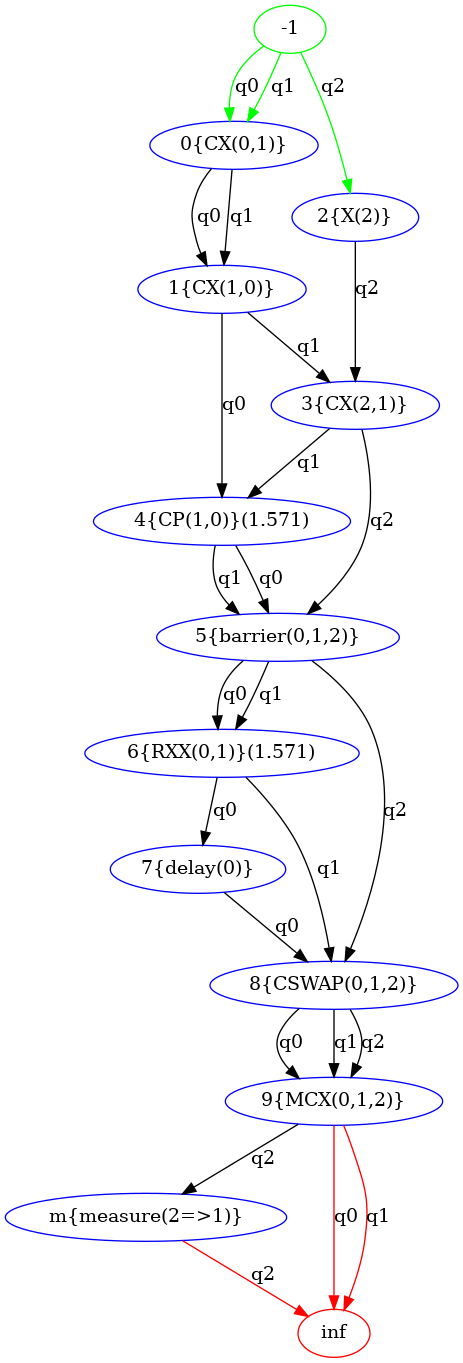

In [3]:
# 创建一个量子电路作为示例，您可以根据需要修改这个电路
simple = QuantumCircuit(3)
simple.cnot(0, 1)
simple.cnot(1, 0)
simple.x(2)
simple.cnot(2, 1)
simple.cp(1, 0,np.pi / 2)
simple.barrier([0, 1, 2])
simple.rxx(0, 1, np.pi / 2)
simple.delay(0, 100)
simple.fredkin(0,1, 2)
simple.mcx([0, 1], 2)
# simple.measure([0], [0])
# simple.measure([1], [2])
simple.measure([2], [1])



# 构建dag
dep_graph = circuit_to_dag(simple)  # 更新为新的函数名

# 可视化dag
draw_dag(dep_graph, output_format="png")  # 或者使用 "svg" 作为输出格式,默认为png





# 在此处添加您的其它代码，例如模拟电路，分析结果等

In [4]:
simple.draw_circuit()

q[0]  --*----+---------P(1.571)----||-------#---------Delay(100ns)----*----*--
        |    |            |        ||   RXX(1.571)                    |    |  
q[1]  --+----*----+-------*--------||-------#-------------------------x----*--
                  |                ||                                 |    |  
q[2]  --X---------*----------------||---------------------------------x----X-- M->c[1]


## Transform dag into circuit

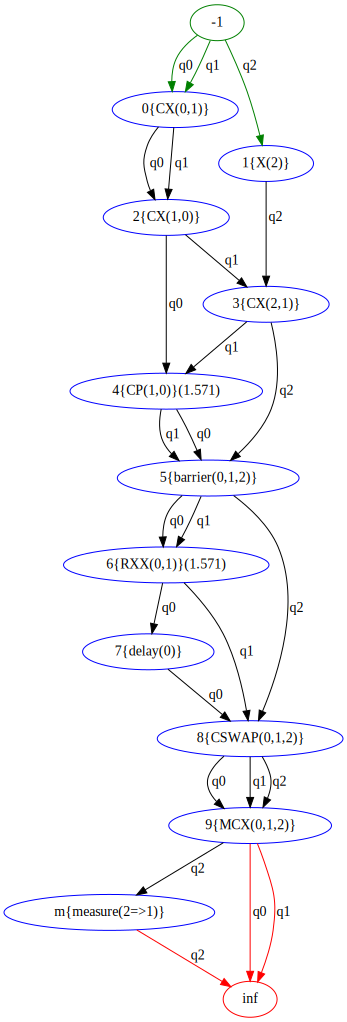

In [5]:
# 从dag中重建量子电路
reconstructed_circuit = dag_to_circuit(dep_graph, simple.num)  # 更新为新的函数名

# 构建dag
dep_graph = circuit_to_dag(reconstructed_circuit)  # 更新为新的函数名

# 可视化dag
draw_dag(dep_graph, output_format="svg")  # 或者使用 "png" 作为输出格式


In [6]:
reconstructed_circuit.draw_circuit()

q[0]  --*----+---------P(1.571)----||-------#---------Delay(100ns)----*----*--
        |    |            |        ||   RXX(1.571)                    |    |  
q[1]  --+----*----+-------*--------||-------#-------------------------x----*--
                  |                ||                                 |    |  
q[2]  --X---------*----------------||---------------------------------x----X-- M->c[1]
